In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'ADM'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-12-31,20894,-19443,1451,705,1099,2704,9374,26028,0,...,4326,108,24,15602,5528,24422,538,-289,653.0,2015-02-14
1,2015-03-31,17506,-16404,1102,493,890,2036,8372,23896,0,...,3142,848,18,14235,5575,22991,45,-244,621.0,2015-04-25
2,2015-06-30,17186,-16222,964,383,867,2224,7845,22588,0,...,3017,157,801,12859,5965,22024,362,-296,621.0,2015-07-25
3,2015-09-30,16565,-15476,1089,253,720,2132,7428,23045,0,...,3072,939,14,14130,5829,23014,691,-279,621.0,2015-10-25
4,2015-12-31,16445,-15580,865,717,910,1738,8243,21829,2185,...,3474,86,12,13505,5779,22258,1372,-306,621.0,2016-02-14


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-12-31,2024-03-08,509.85,22978,-21298,1680,823,1368,4232,11957,...,6341,54631,6313,105,1,18662,8259,30166,2569,-439
37,2024-03-31,2024-04-29,494.44,21847,-20188,1659,719,830,4178,11634,...,7051,54831,5599,1734,1,19730,8245,31292,700,-328
38,2024-06-30,2024-07-29,493.00,22248,-20852,1396,481,764,4382,10443,...,6970,52698,5035,2312,1,18684,8247,30237,468,-362
39,2024-09-30,2024-11-18,483.00,19937,-18572,1365,18,784,3770,10746,...,6999,52199,4911,1733,725,19003,7578,29932,1300,-381
40,2024-12-31,2025-02-20,493.00,21498,-20140,1358,561,611,3708,11572,...,6769,53271,5535,1903,324,19938,7580,30840,322,-491


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-12-31,2024-03-08,509.85,22978,-21298,1680,823,1368,4232,11957,...,54631,6313,105,1,18662,8259,30166,2569,-439,1
37,2024-03-31,2024-04-29,494.44,21847,-20188,1659,719,830,4178,11634,...,54831,5599,1734,1,19730,8245,31292,700,-328,1
38,2024-06-30,2024-07-29,493.00,22248,-20852,1396,481,764,4382,10443,...,52698,5035,2312,1,18684,8247,30237,468,-362,1
39,2024-09-30,2024-11-18,483.00,19937,-18572,1365,18,784,3770,10746,...,52199,4911,1733,725,19003,7578,29932,1300,-381,1
40,2024-12-31,2025-02-20,493.00,21498,-20140,1358,561,611,3708,11572,...,53271,5535,1903,324,19938,7580,30840,322,-491,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-12-31,2024-03-08,509.85,22978.0,-21298.0,1680.0,823.0,1368.0,4232.0,11957.0,...,54631.0,6313.0,105.0,1.0,18662.0,8259.0,30166.0,2569.0,-439.0,1
37,2024-03-31,2024-04-29,494.44,21847.0,-20188.0,1659.0,719.0,830.0,4178.0,11634.0,...,54831.0,5599.0,1734.0,1.0,19730.0,8245.0,31292.0,700.0,-328.0,1
38,2024-06-30,2024-07-29,493.00,22248.0,-20852.0,1396.0,481.0,764.0,4382.0,10443.0,...,52698.0,5035.0,2312.0,1.0,18684.0,8247.0,30237.0,468.0,-362.0,1
39,2024-09-30,2024-11-18,483.00,19937.0,-18572.0,1365.0,18.0,784.0,3770.0,10746.0,...,52199.0,4911.0,1733.0,725.0,19003.0,7578.0,29932.0,1300.0,-381.0,1
40,2024-12-31,2025-02-20,493.00,21498.0,-20140.0,1358.0,561.0,611.0,3708.0,11572.0,...,53271.0,5535.0,1903.0,324.0,19938.0,7580.0,30840.0,322.0,-491.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2015-02-16,36.036098,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.444917,0.555083,0.0,0.0,0.0,0.0,0.069446,0.033742,0.0,0.0
1,2015-02-23,35.834023,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.444917,0.555083,0.0,0.0,0.0,0.0,0.069446,0.033742,0.0,0.0
2,2015-03-02,34.614105,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.444917,0.555083,0.0,0.0,0.0,0.0,0.069446,0.033742,0.0,0.0
3,2015-03-09,34.651527,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.444917,0.555083,0.0,0.0,0.0,0.0,0.069446,0.033742,0.0,0.0
4,2015-03-16,35.137993,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.444917,0.555083,0.0,0.0,0.0,0.0,0.069446,0.033742,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2015-02-16,36.036098,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.0,0.069446,0.033742,0.0,0.0,inf,1.202124,inf,inf,inf
1,2015-02-23,35.834023,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.0,0.069446,0.033742,0.0,0.0,inf,1.195383,inf,inf,inf
2,2015-03-02,34.614105,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.0,0.069446,0.033742,0.0,0.0,inf,1.154688,inf,inf,inf
3,2015-03-09,34.651527,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.0,0.069446,0.033742,0.0,0.0,inf,1.155936,inf,inf,inf
4,2015-03-16,35.137993,2014-12-31,20894.0,0.0,29.977029,653.0,0.0,0.0,1099.0,...,0.0,0.069446,0.033742,0.0,0.0,inf,1.172164,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

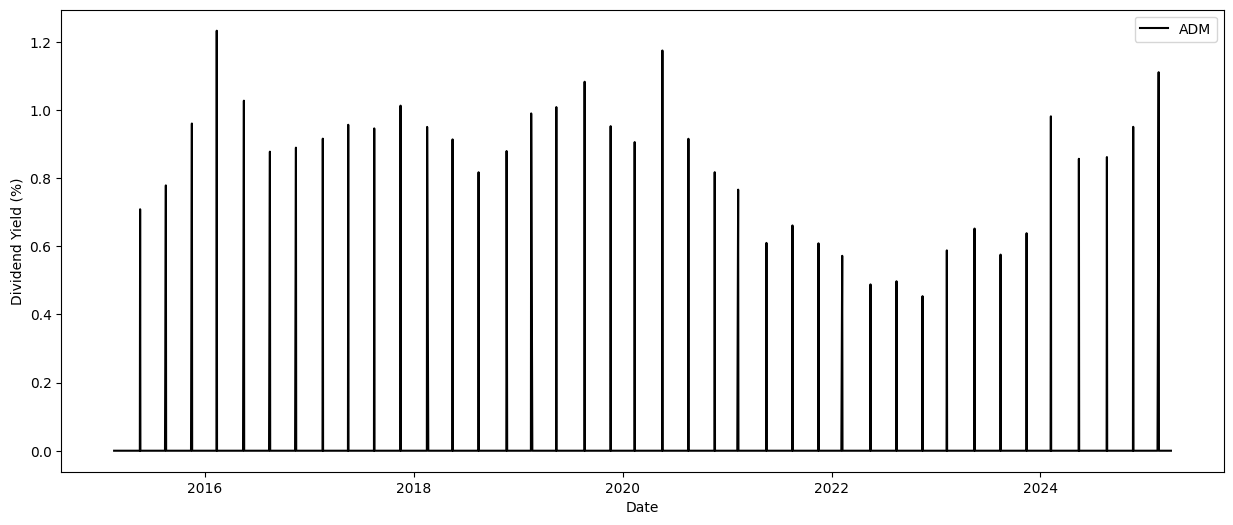

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


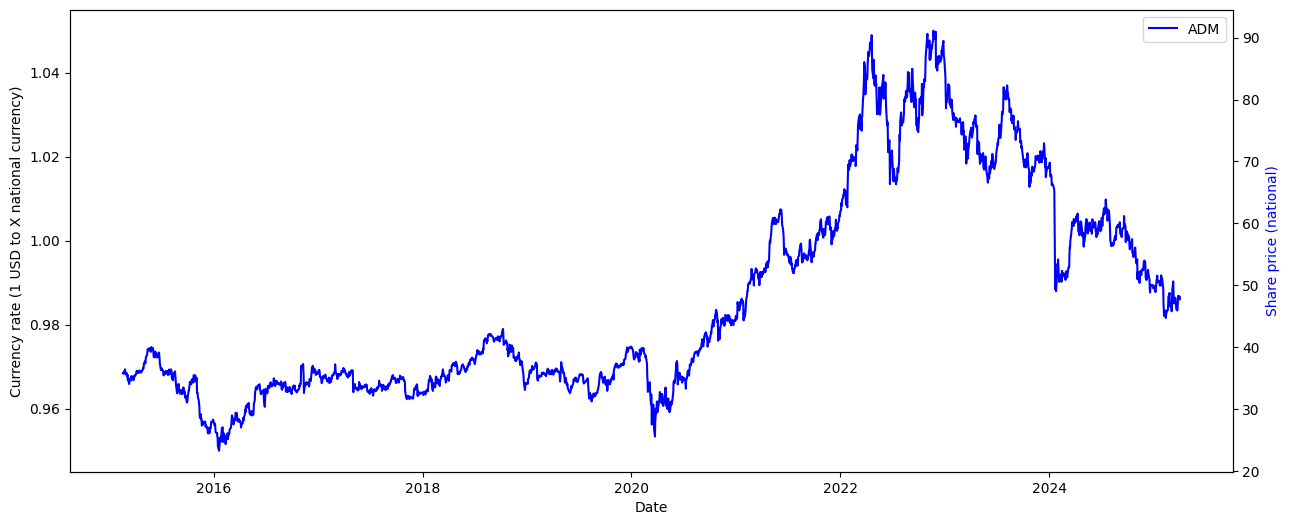

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

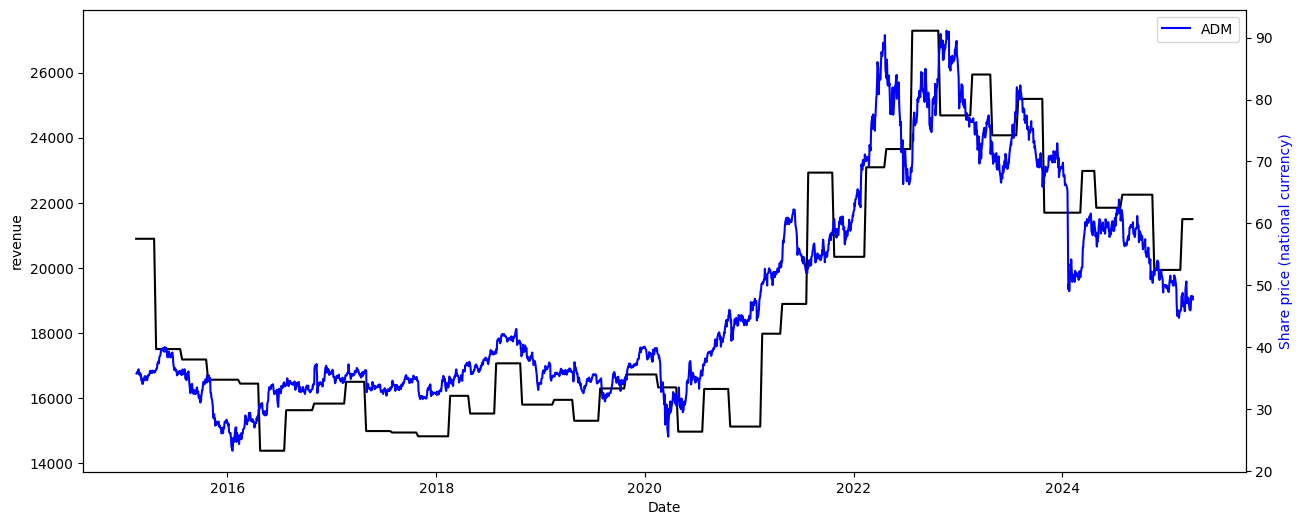

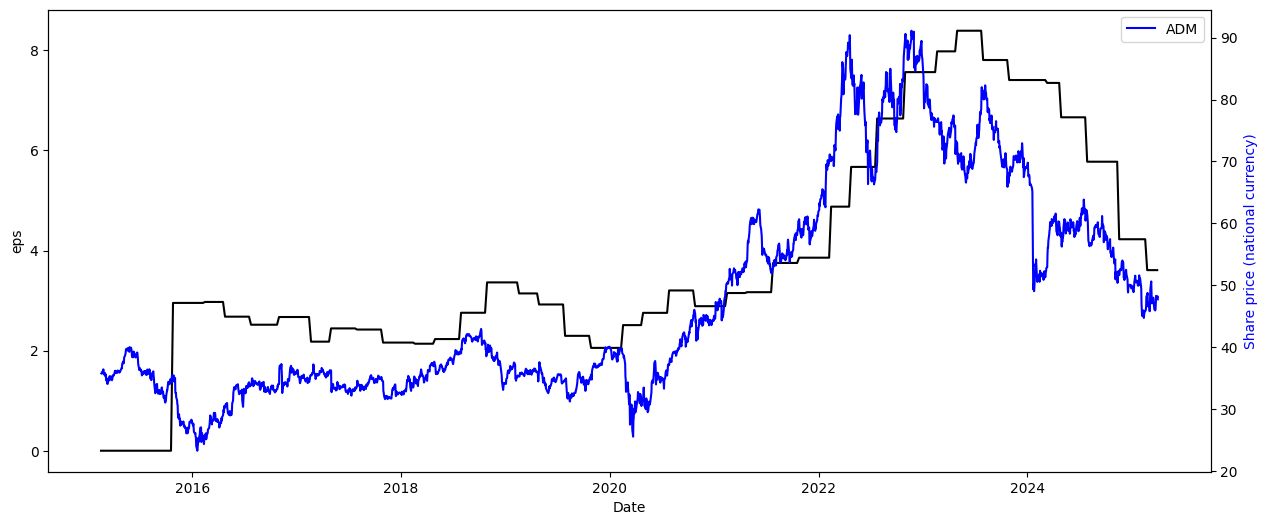

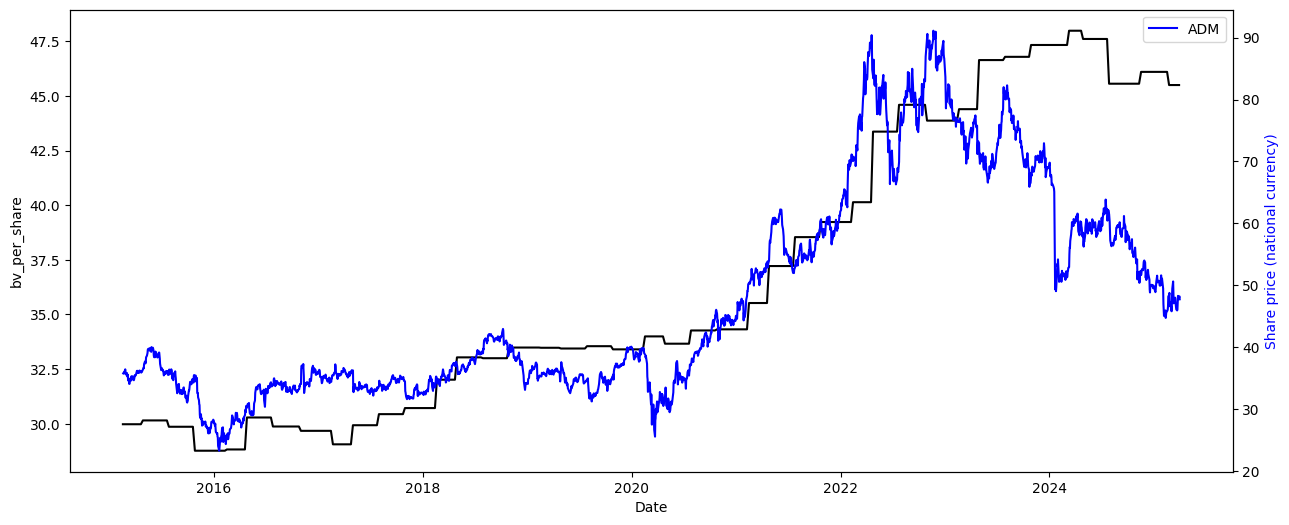

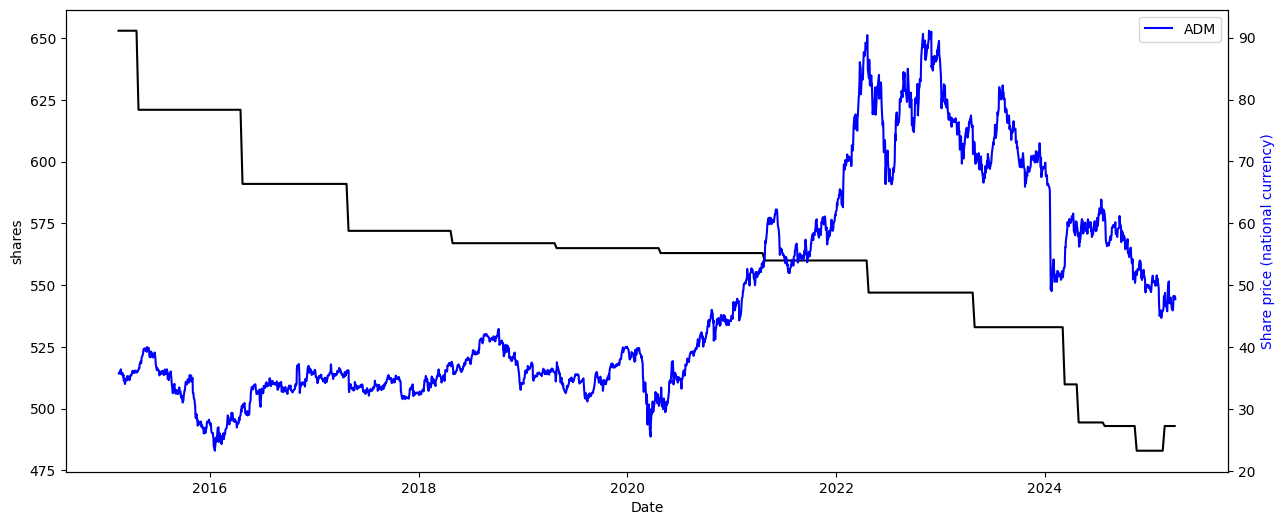

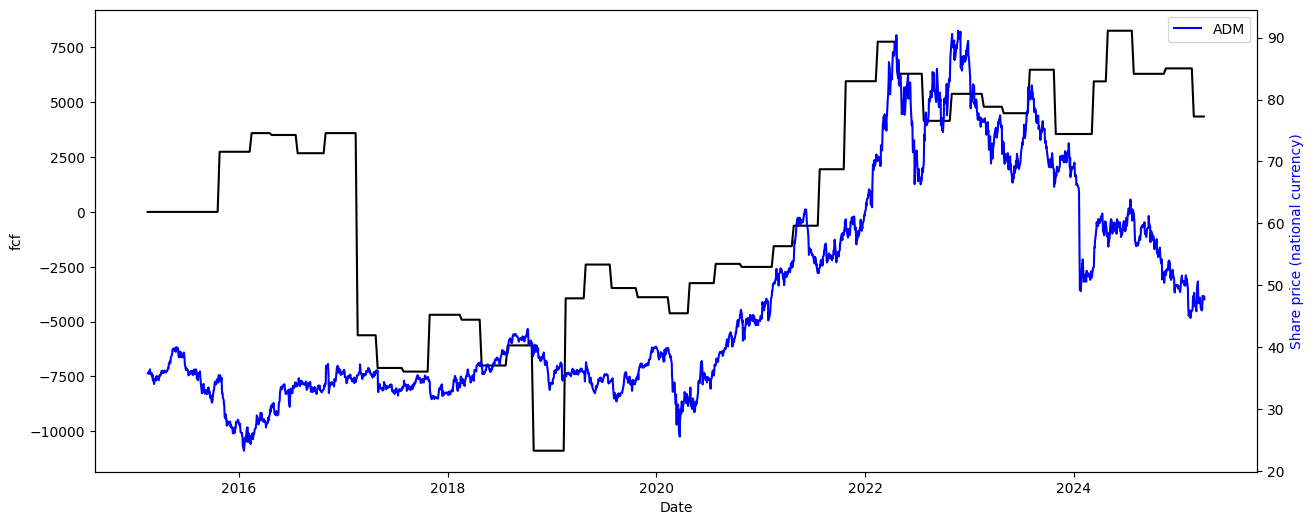

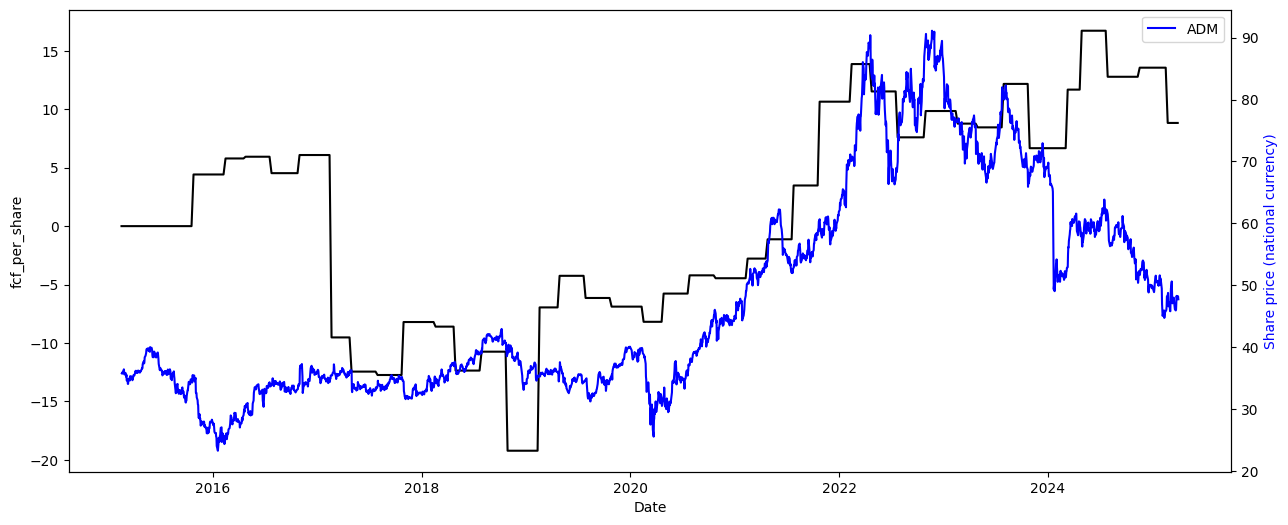

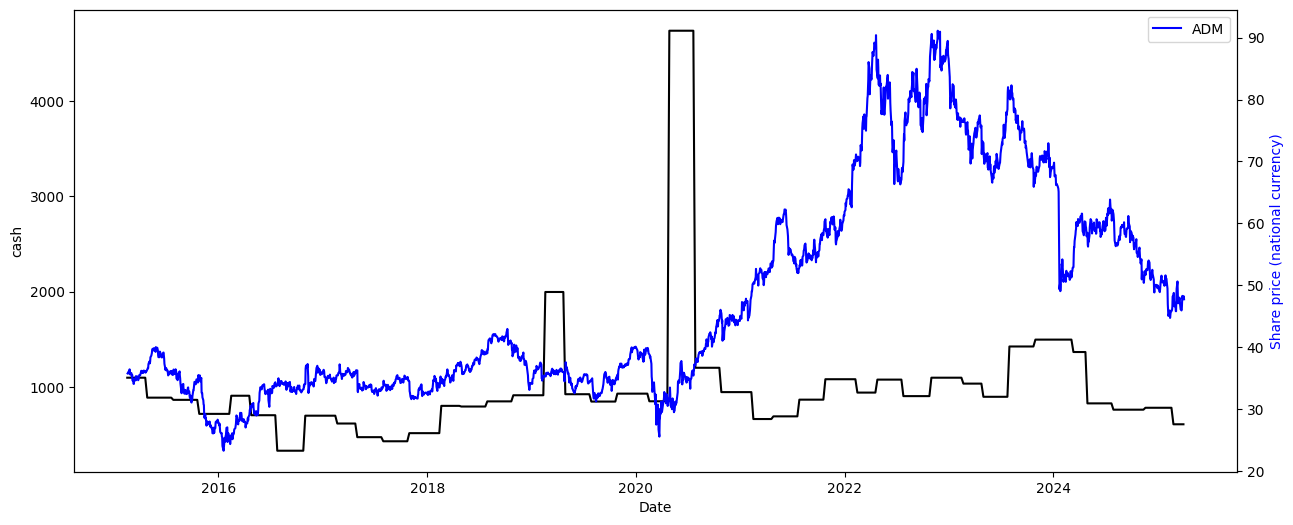

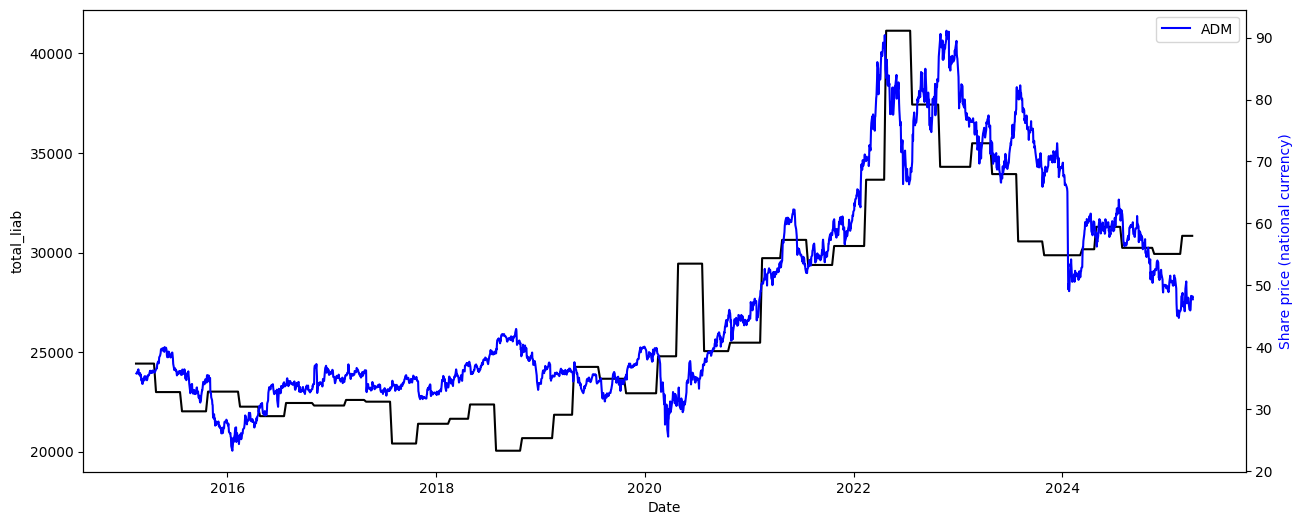

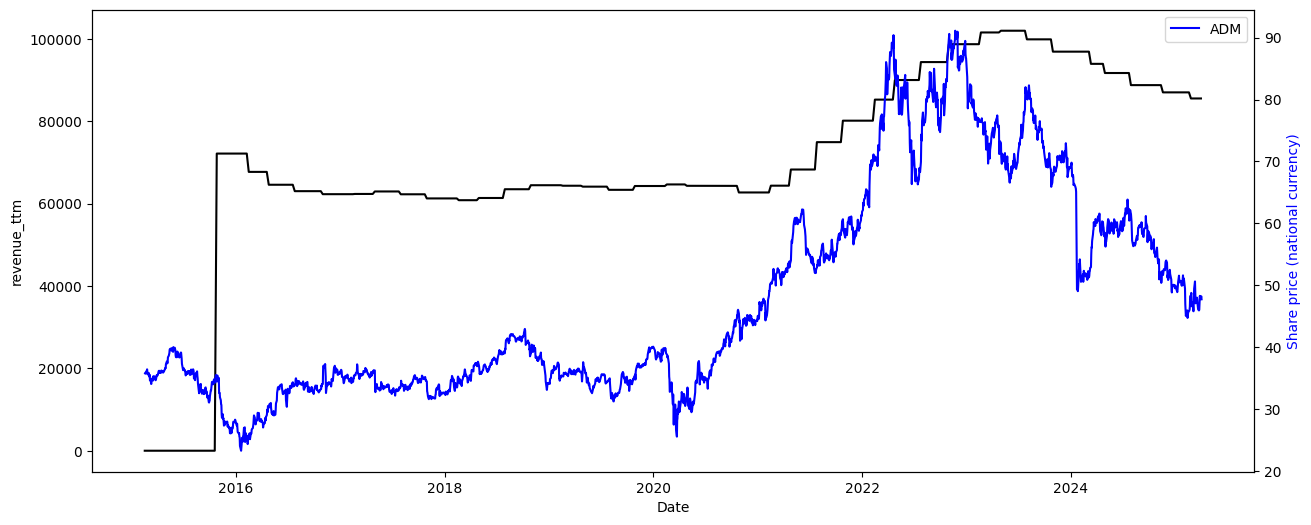

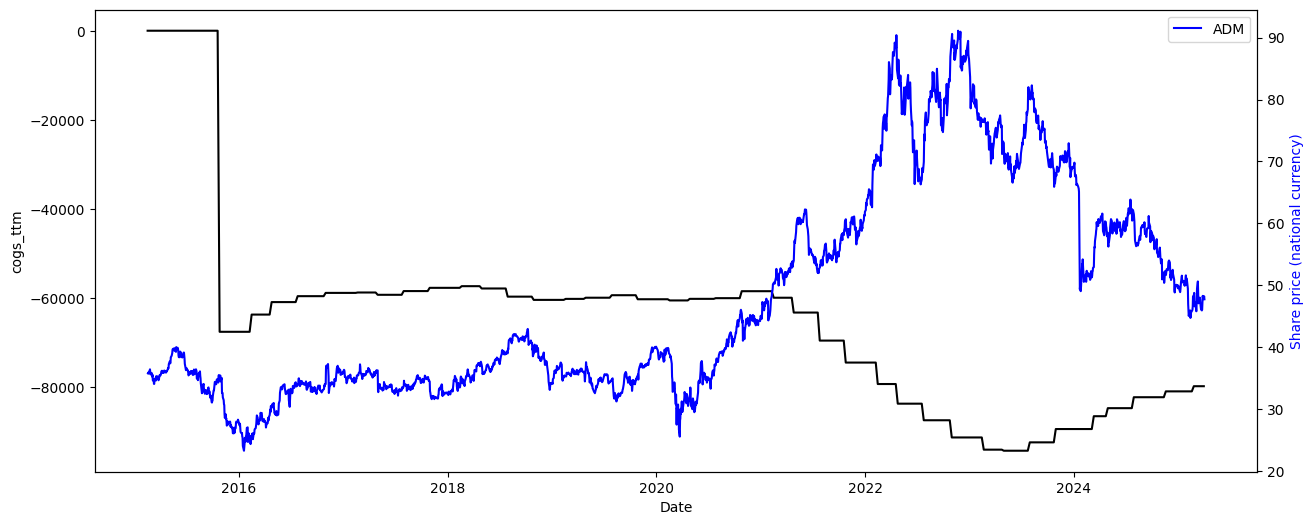

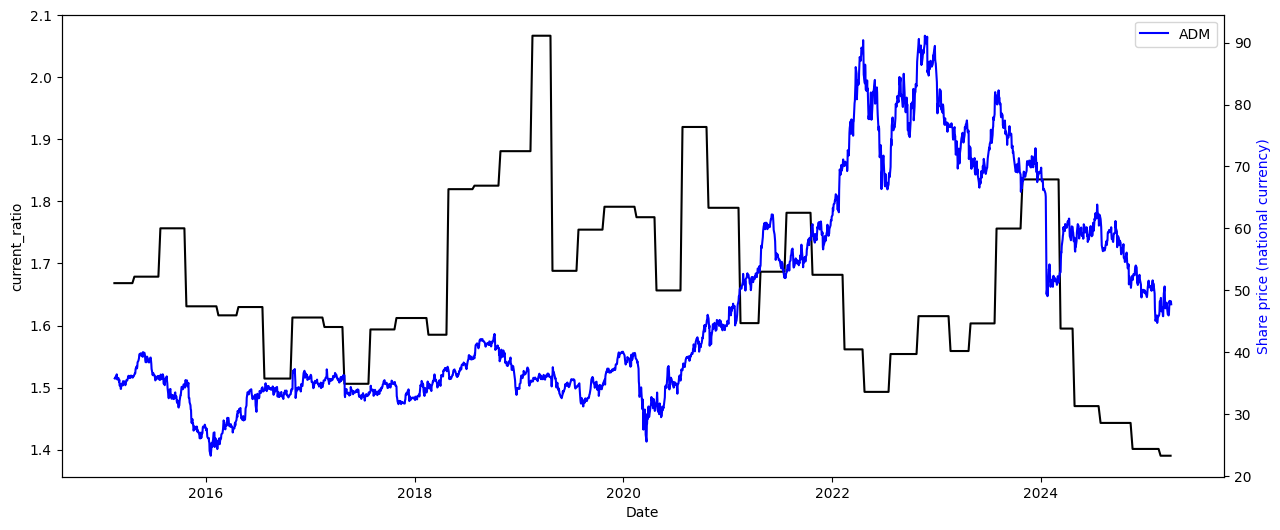

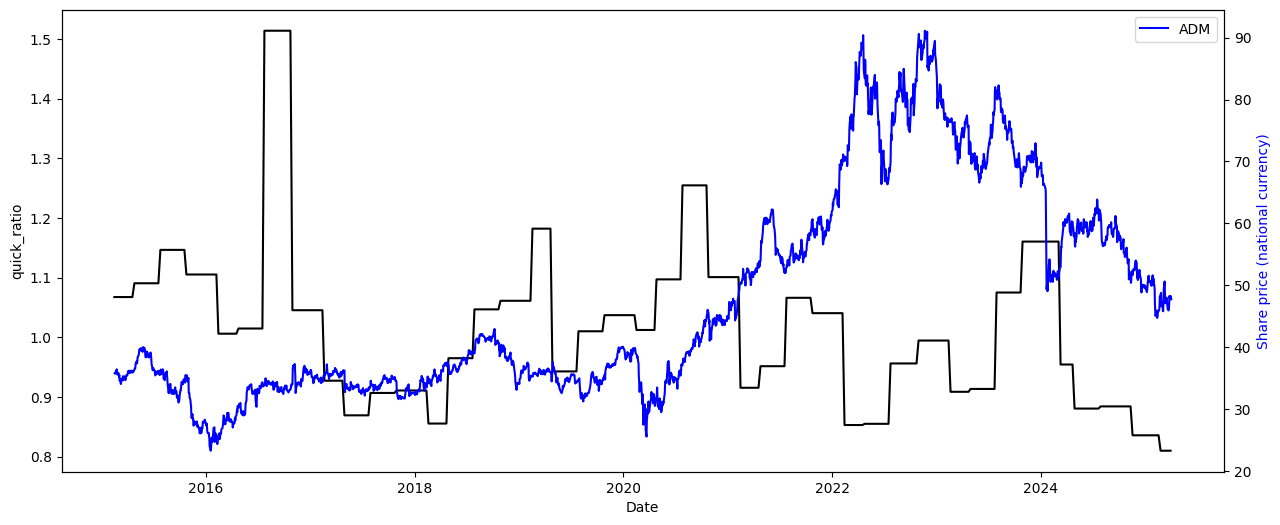

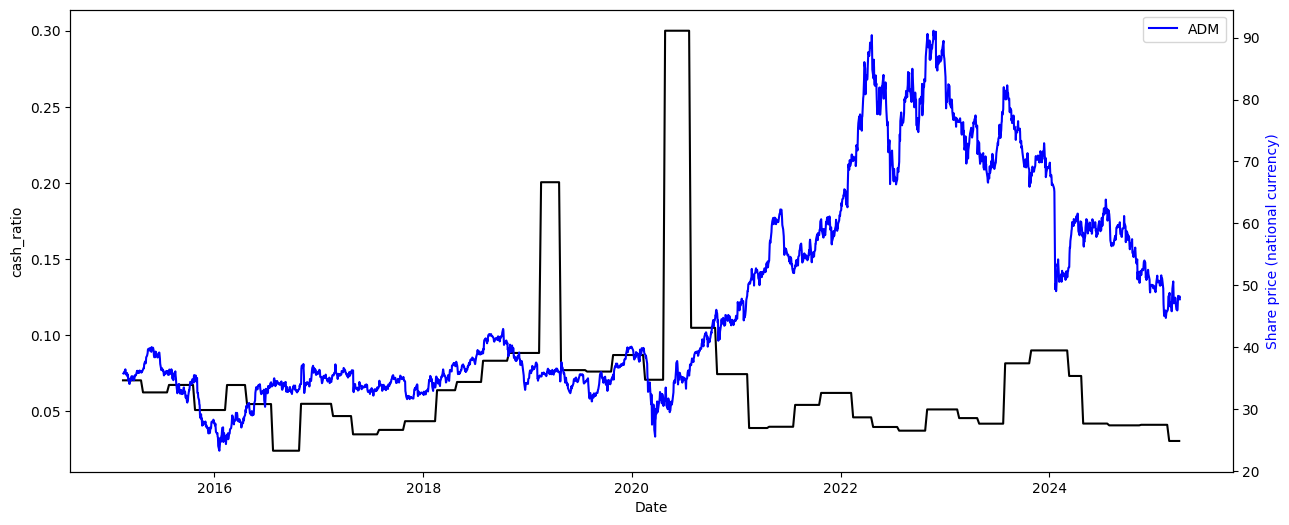

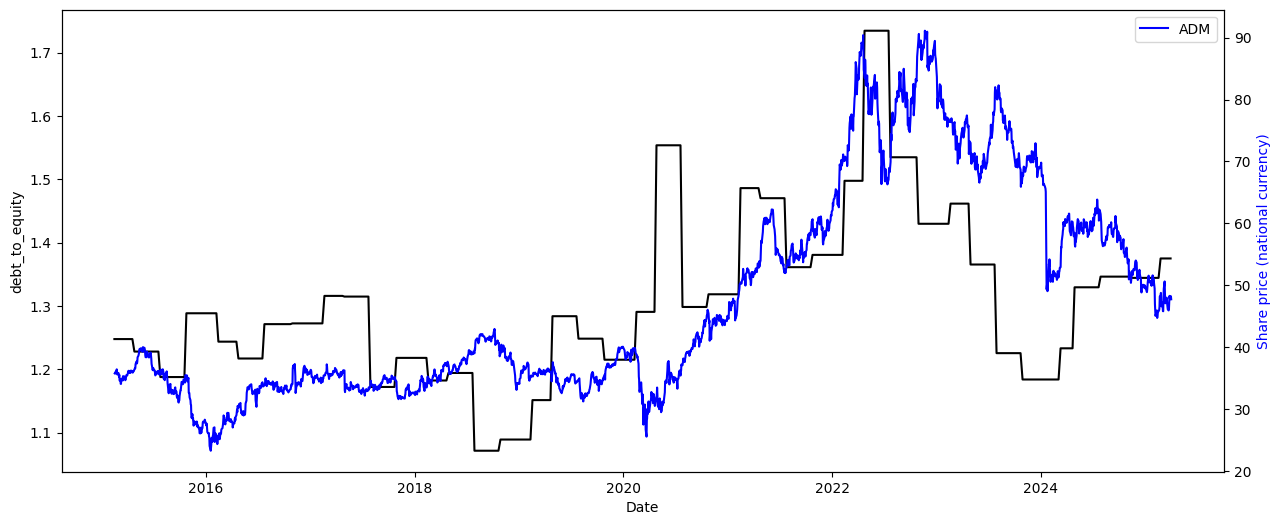

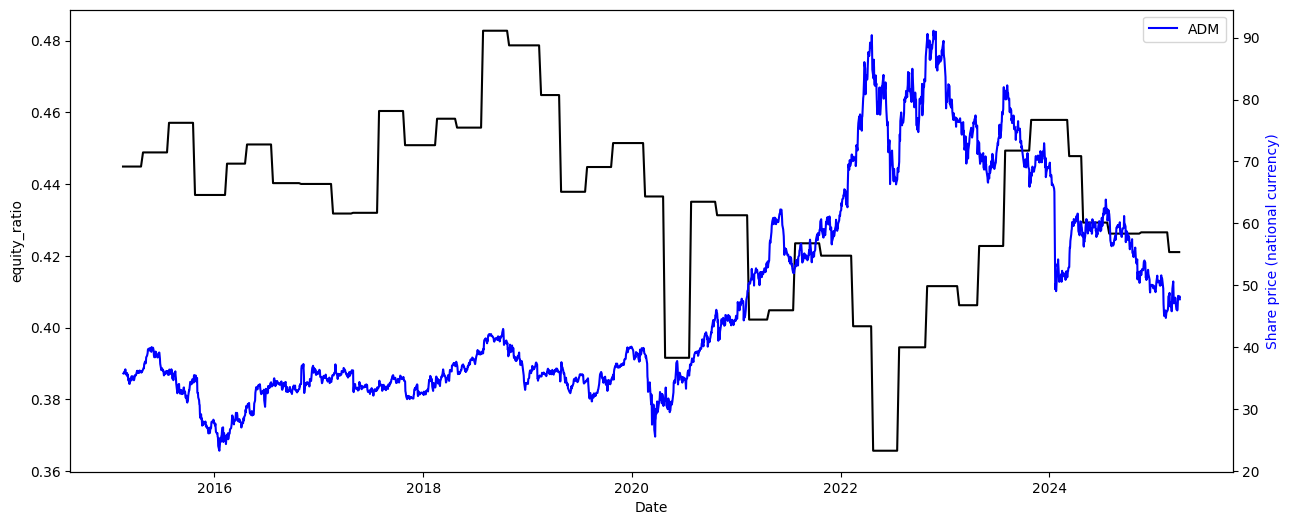

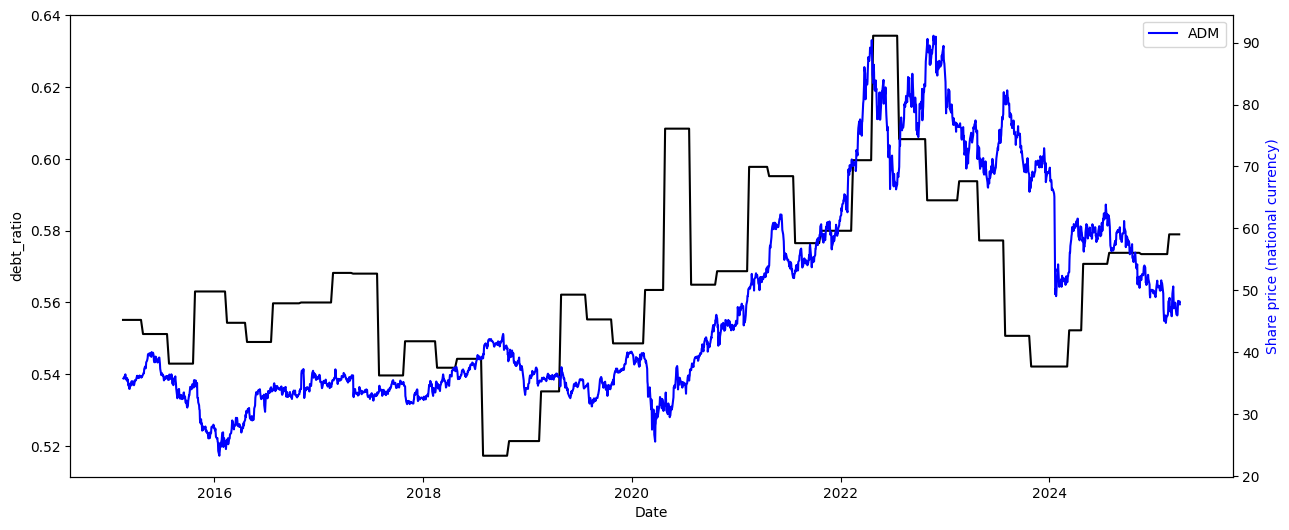

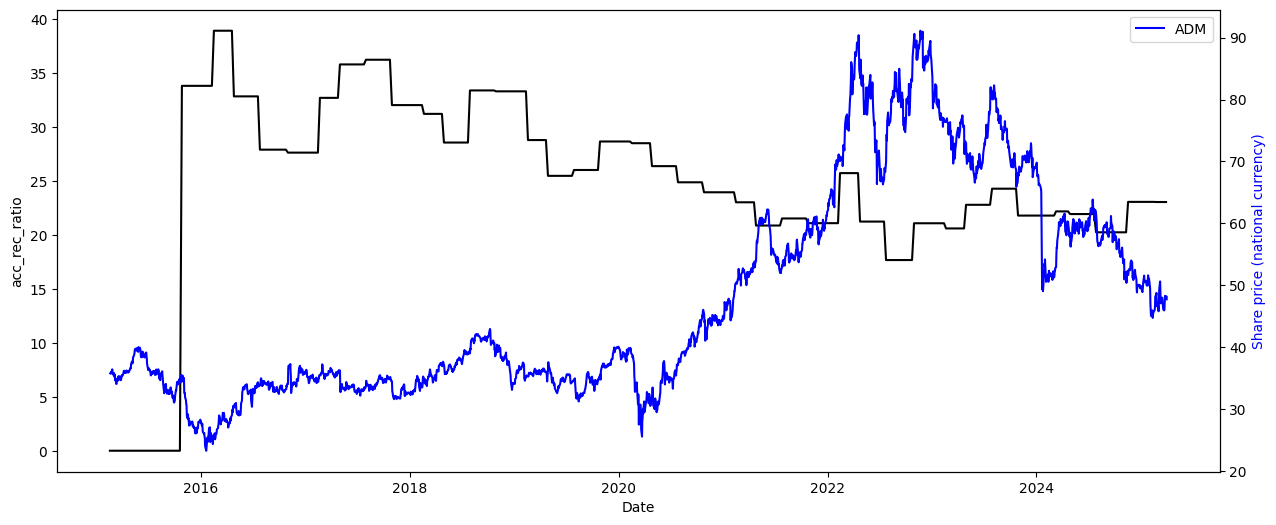

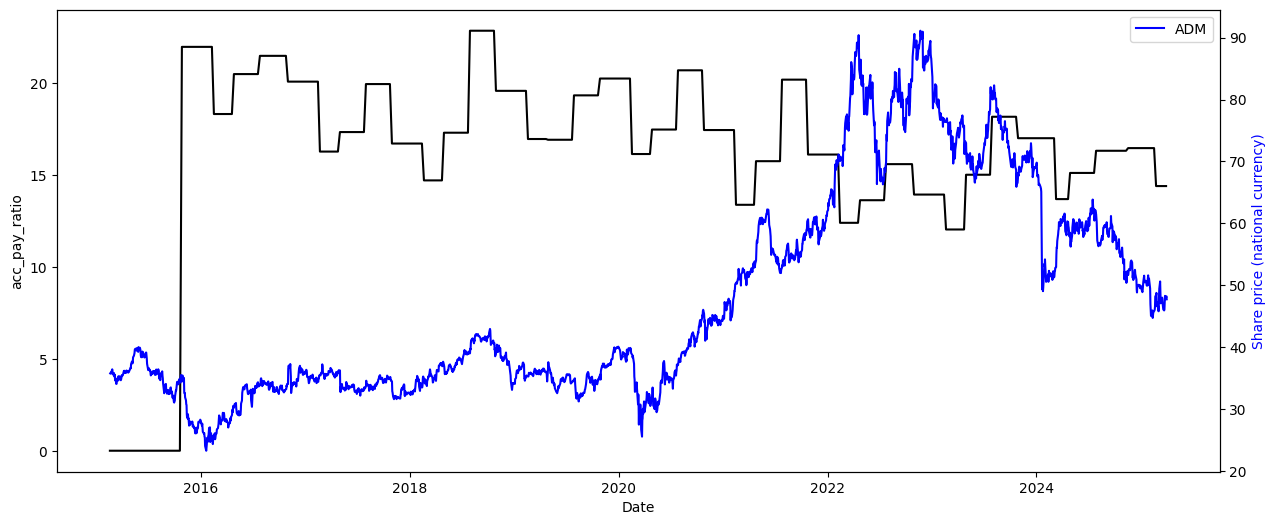

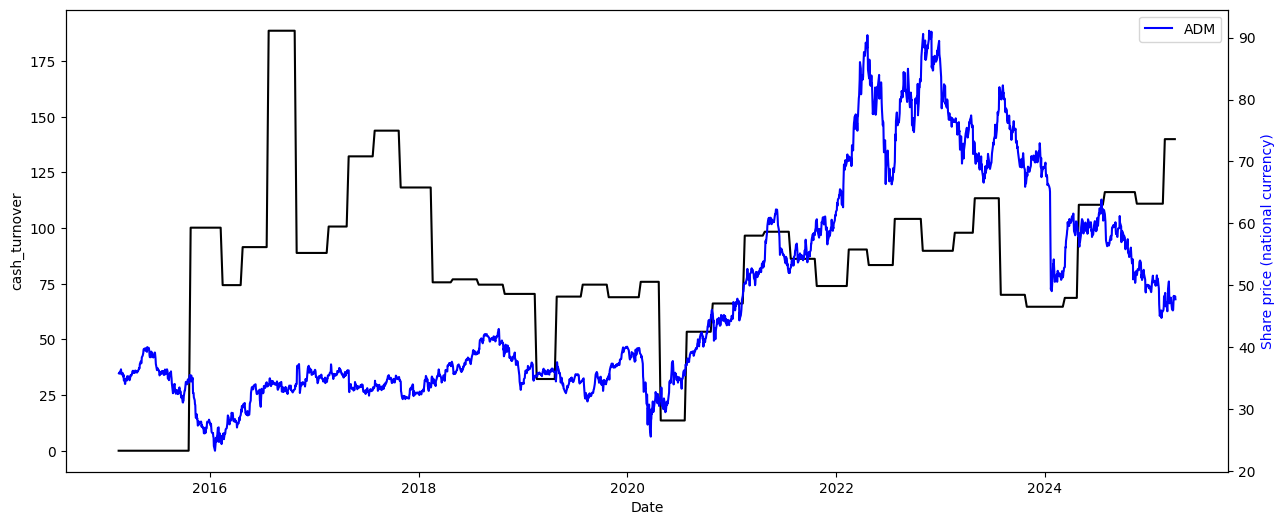

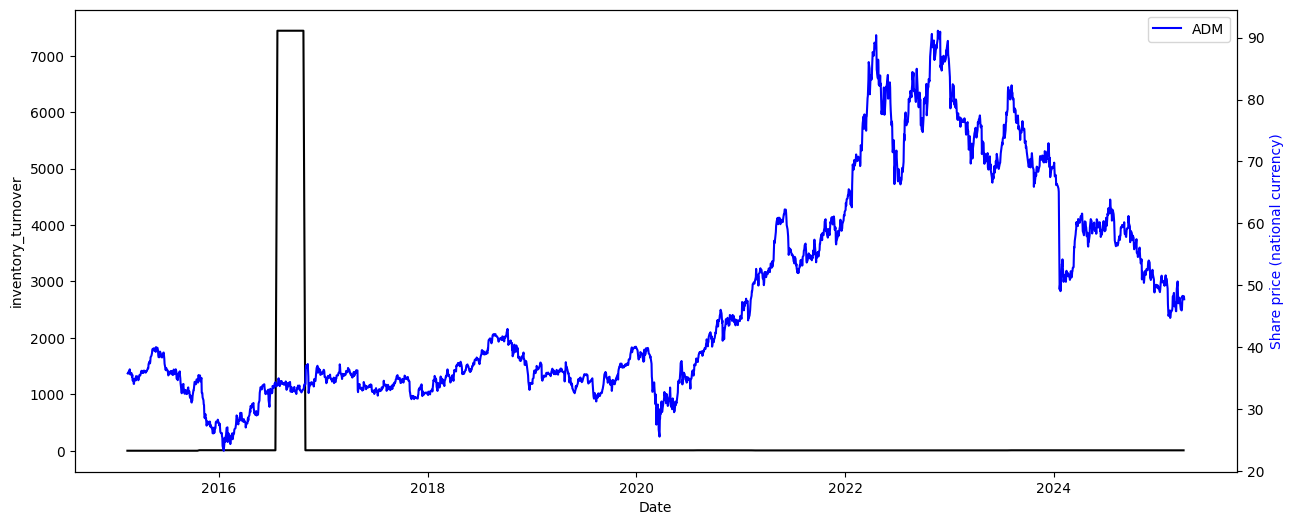

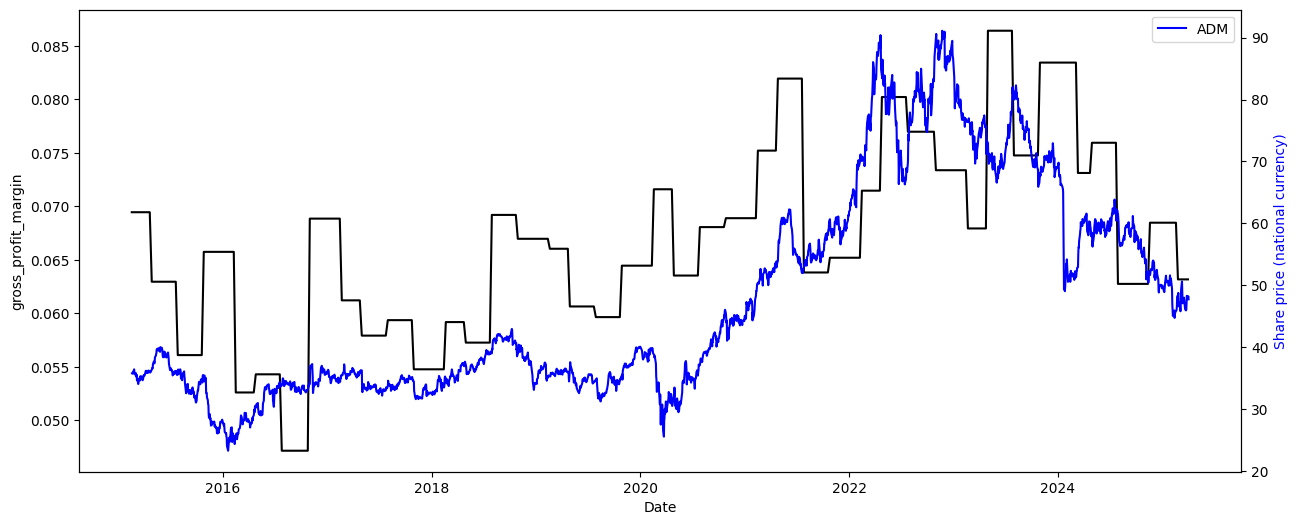

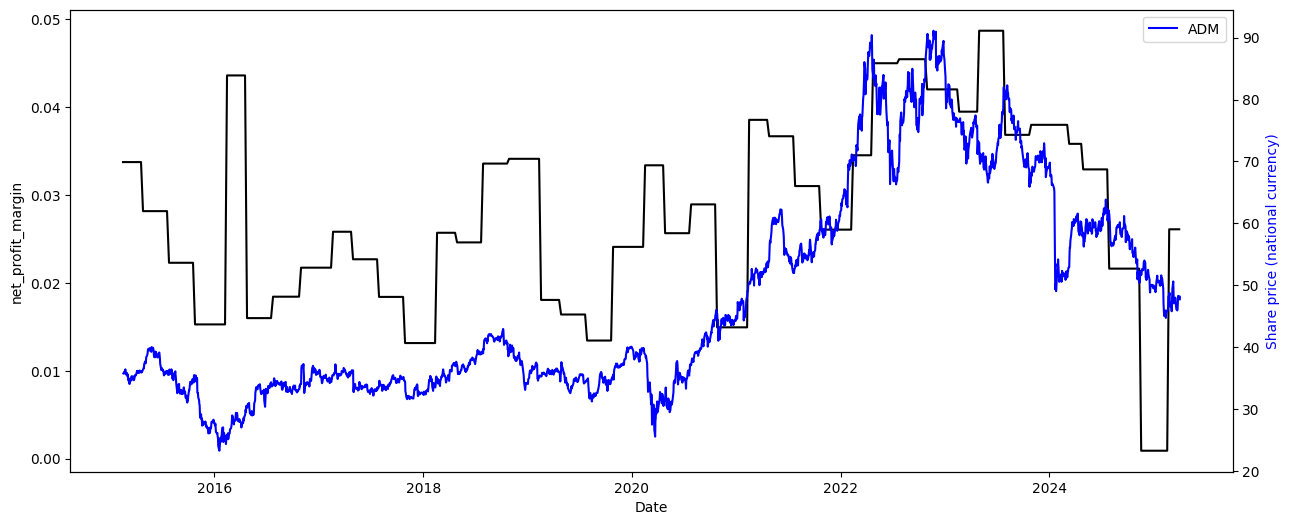

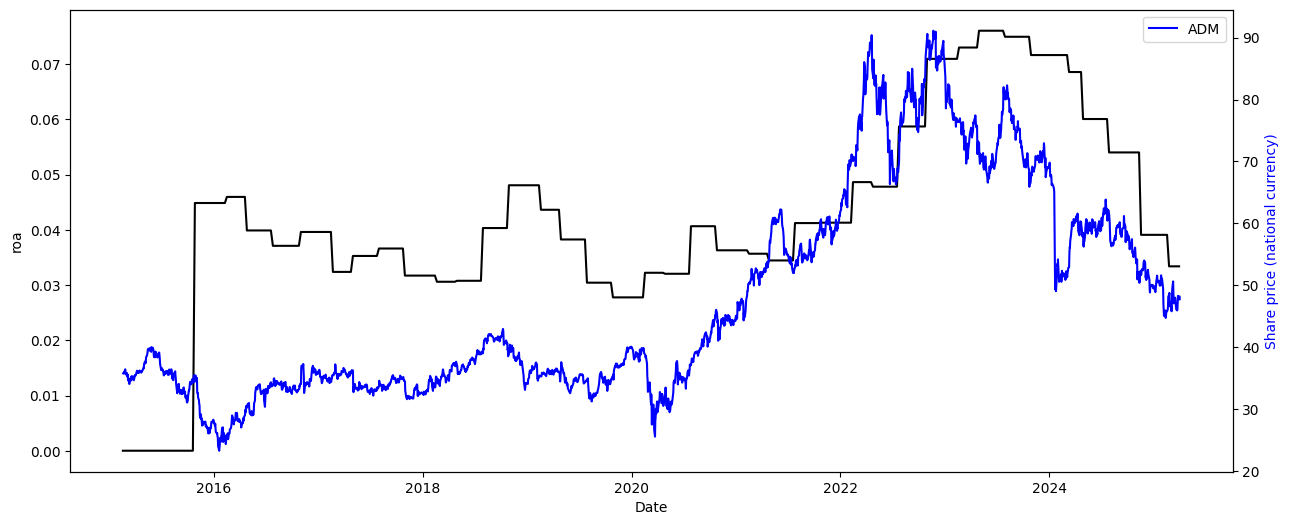

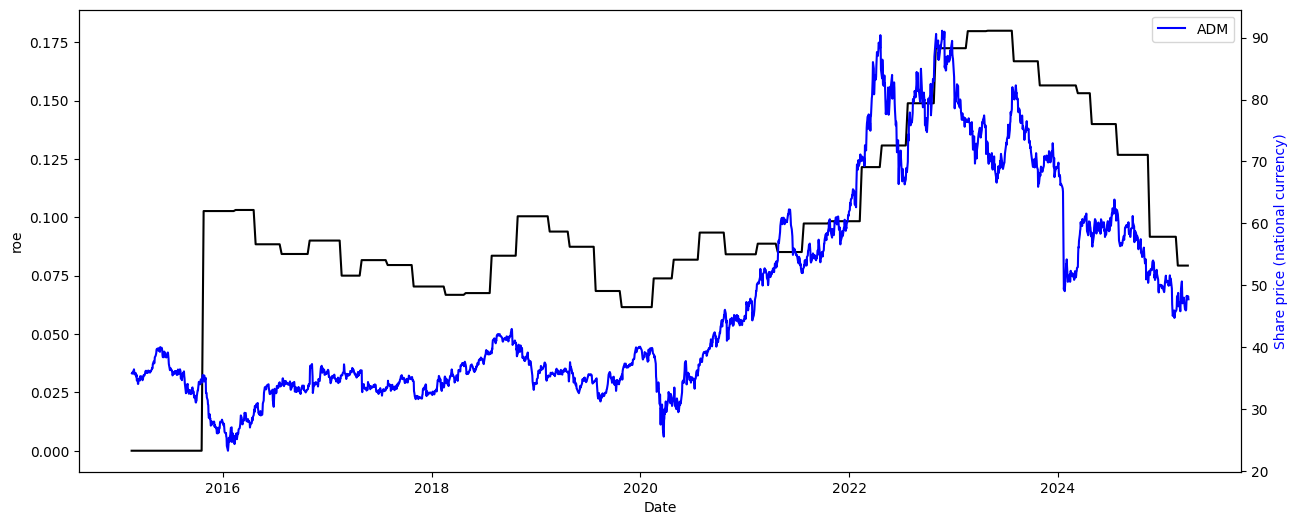

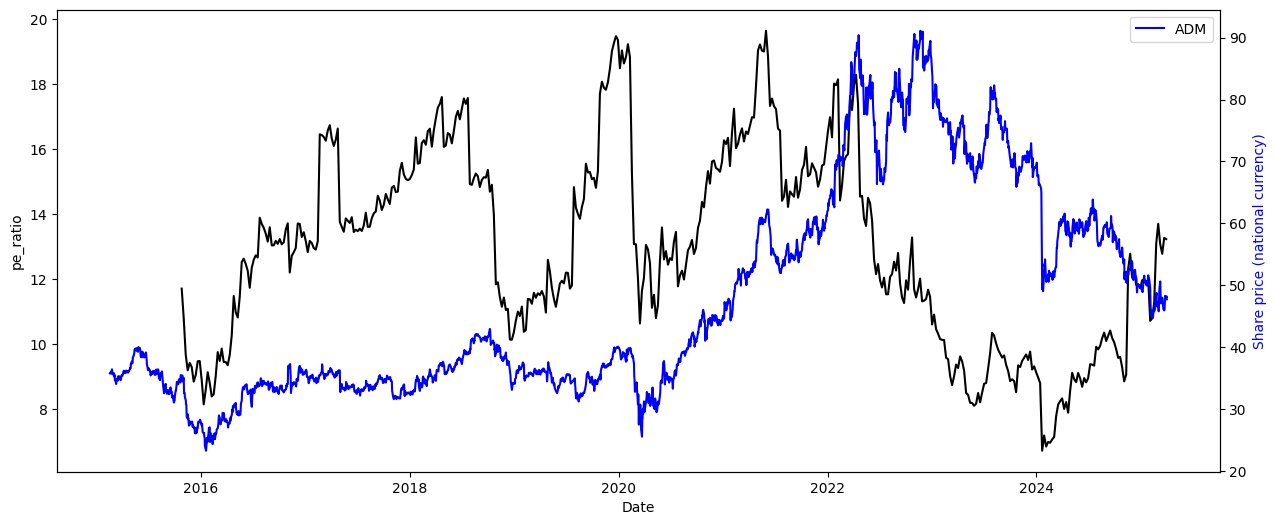

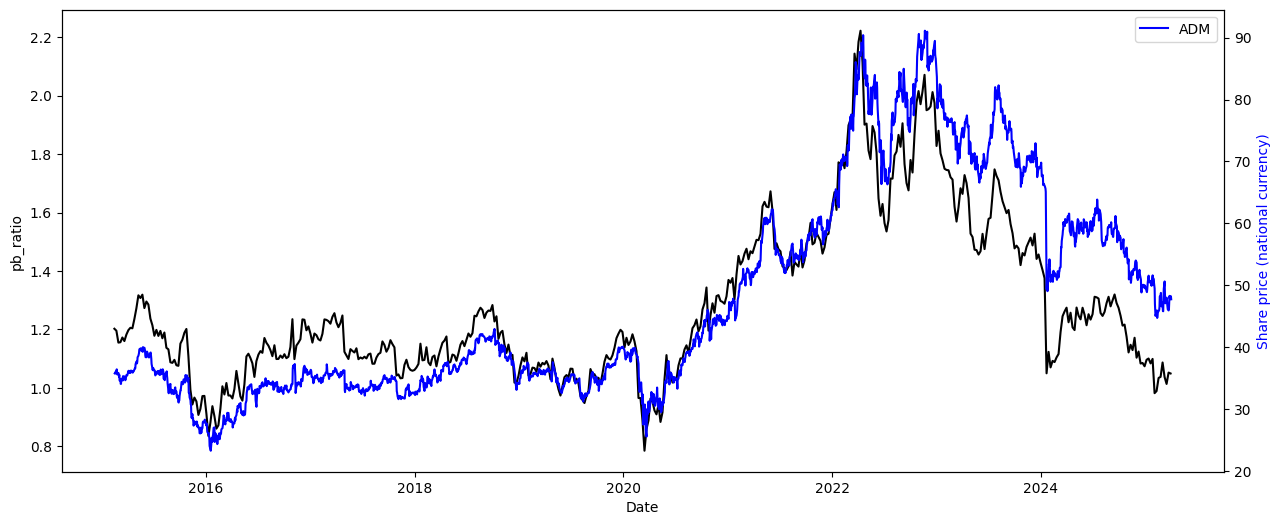

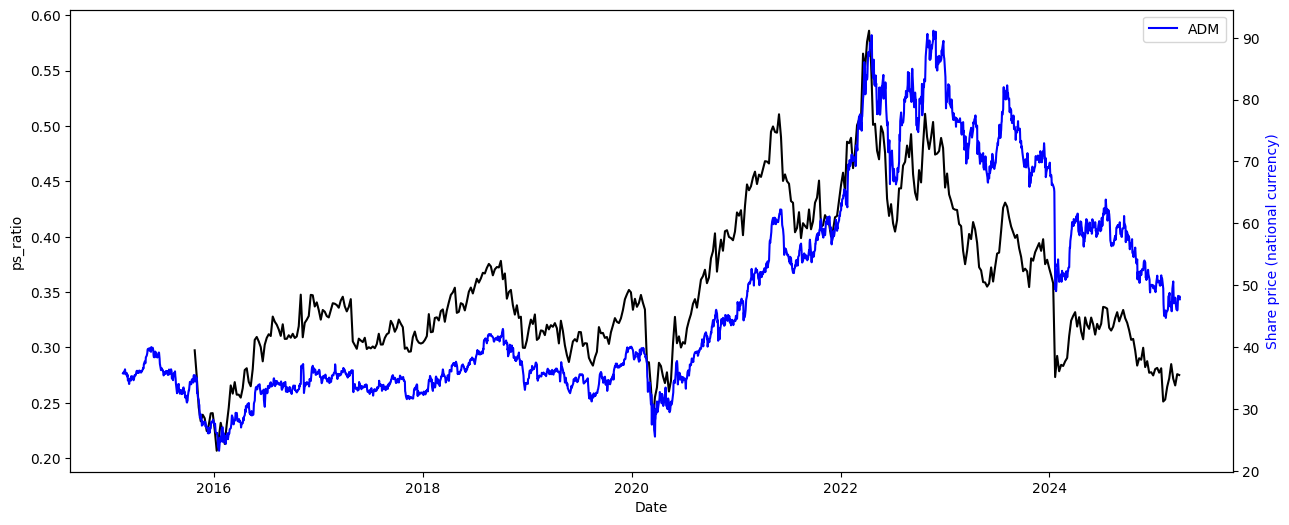

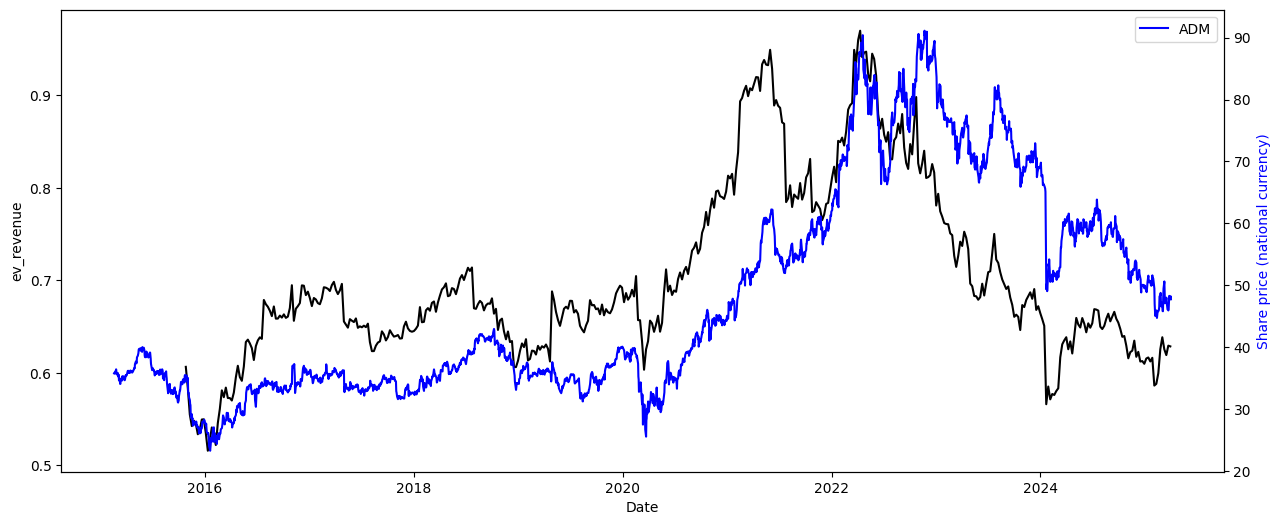

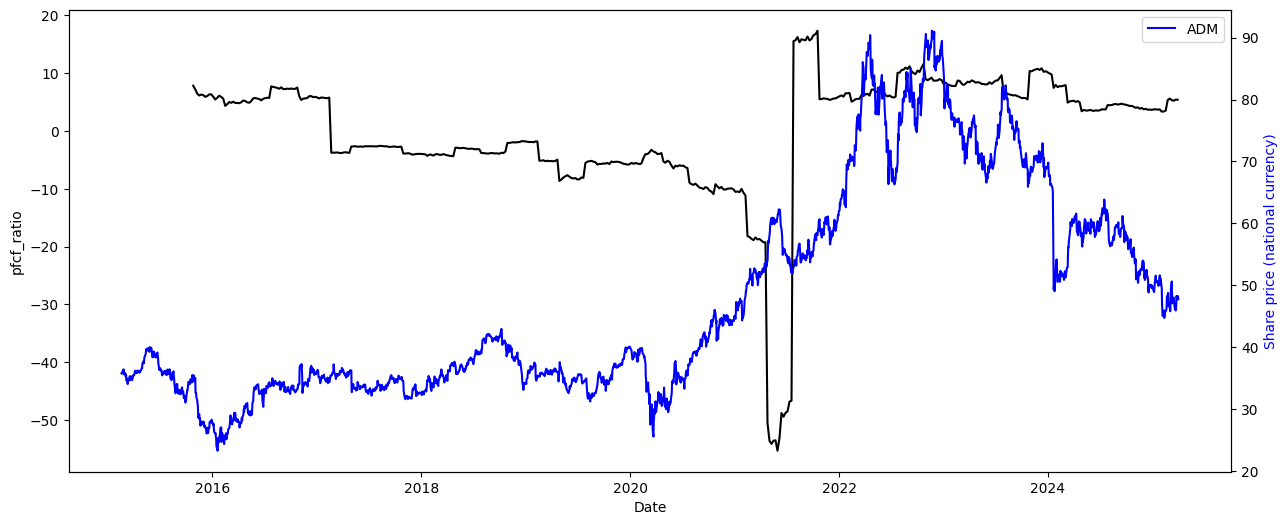

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

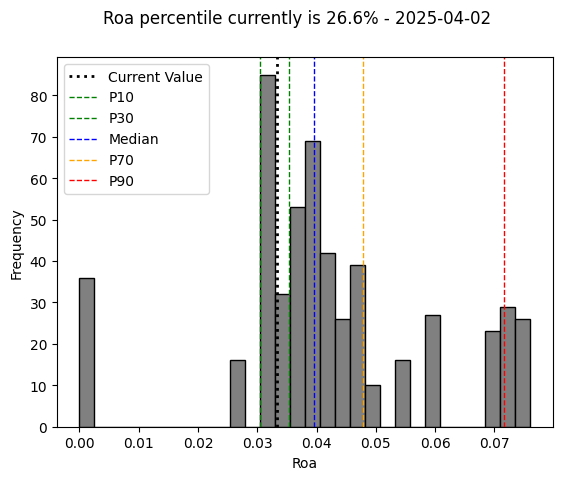

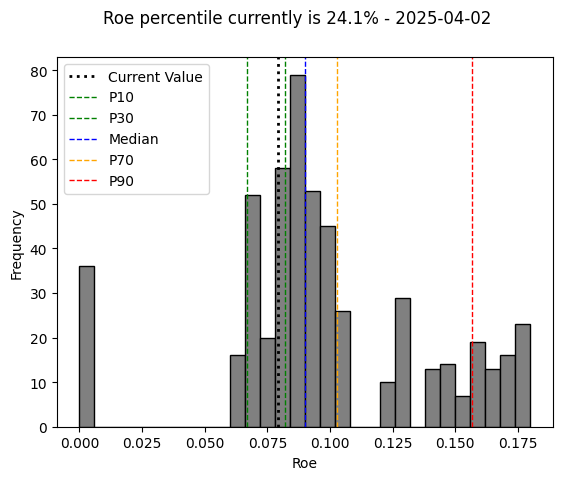

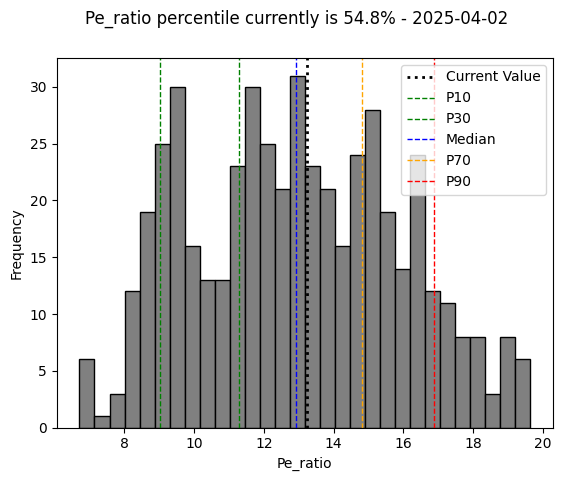

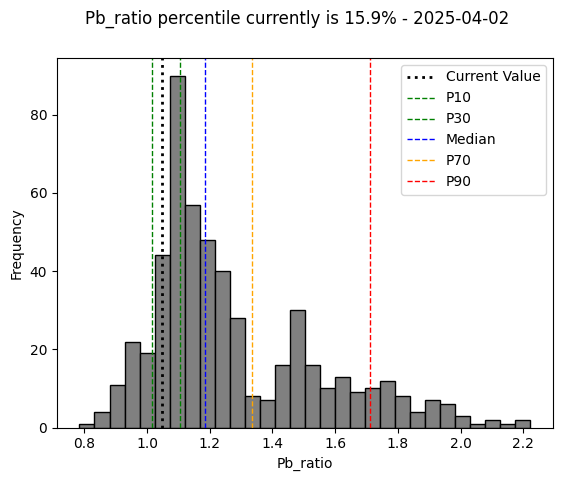

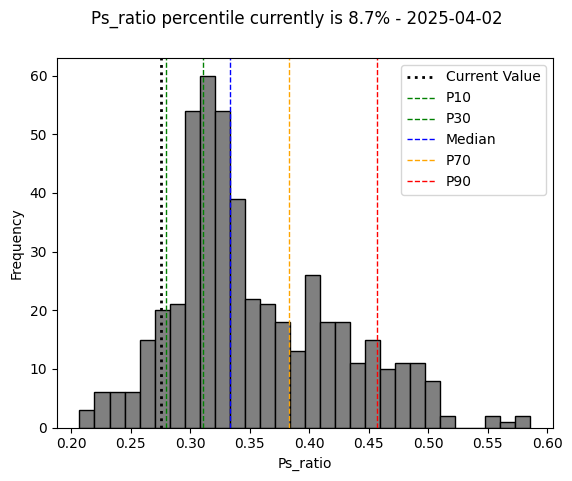

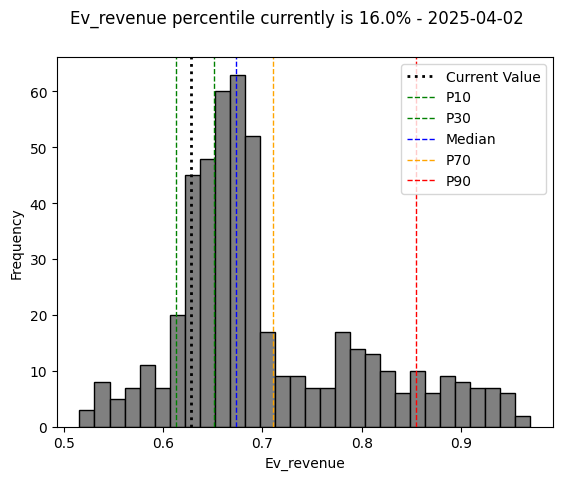

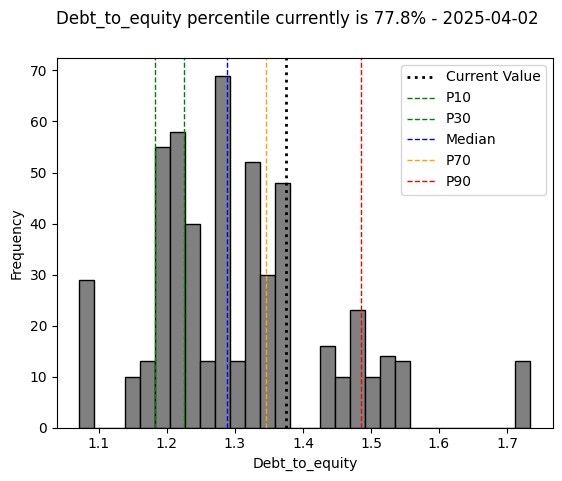

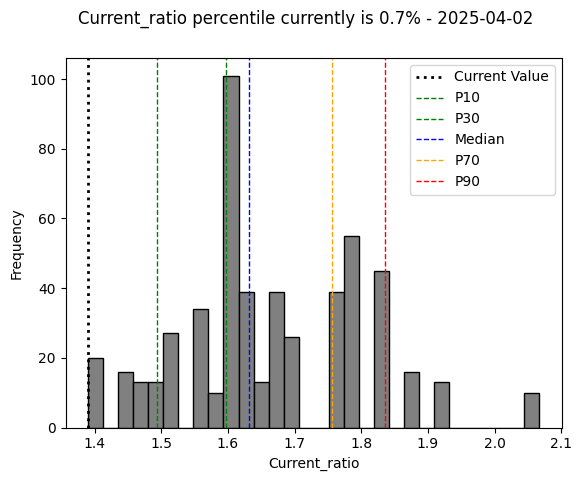

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.989283,-0.738878,0.467995,0.279307,0.048036,0.211019,-0.110320
roe,0.989283,1.000000,-0.693233,0.544018,0.369321,0.174056,0.345785,-0.182772
pe_ratio,-0.738878,-0.693233,1.000000,0.077762,0.356960,0.478911,0.047993,0.133668
pb_ratio,0.467995,0.544018,0.077762,1.000000,0.930789,0.810462,0.577261,-0.155443
ps_ratio,0.279307,0.369321,0.356960,0.930789,1.000000,0.939756,0.526280,0.032046
ev_revenue,0.048036,0.174056,0.478911,0.810462,0.939756,1.000000,0.683230,-0.048433
debt_to_equity,0.211019,0.345785,0.047993,0.577261,0.526280,0.683230,1.000000,-0.496232
current_ratio,-0.110320,-0.182772,0.133668,-0.155443,0.032046,-0.048433,-0.496232,1.000000


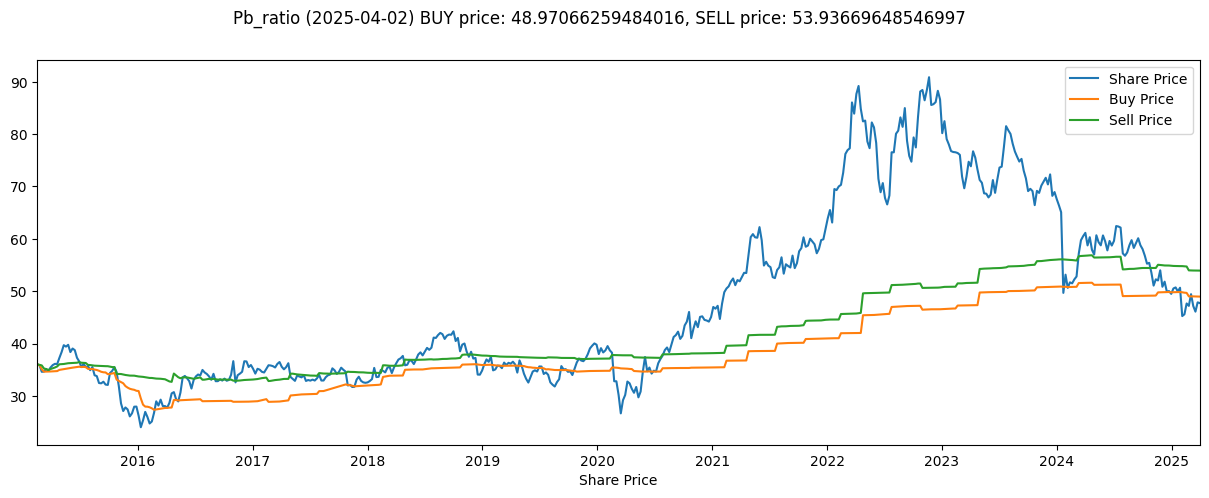

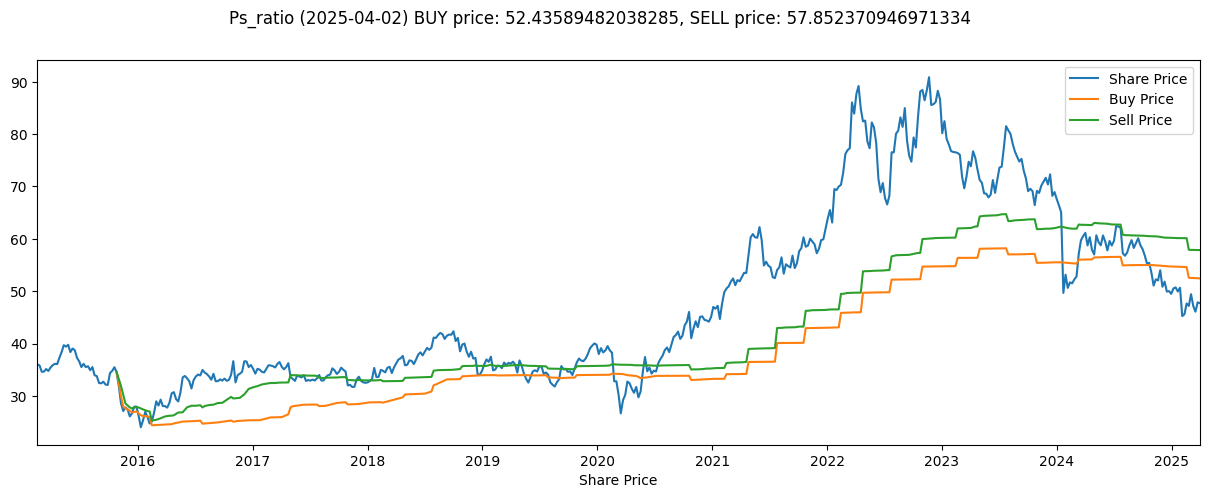

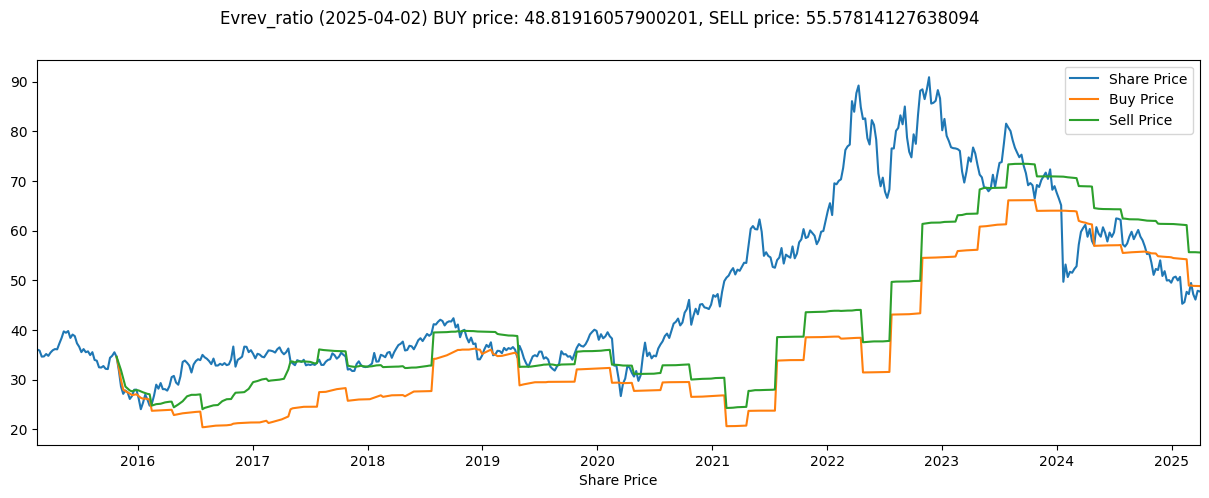

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)